# Data Exploration

In [175]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [150]:
#load data
train = pd.read_csv("../../data/training_values.csv", index_col= 'id')
target = pd.read_csv("../../data/training_labels.csv", index_col = 'id')

In [147]:
#get the first 10 information about the columns
train.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [148]:
#checking the first 10 rows of the target
target.head()

,status_group
id,
69572,1
8776,1
34310,1
67743,0
19728,1


In [149]:
#getting the information of the target
target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 69572 to 26348
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   status_group  59400 non-null  int64
dtypes: int64(1)
memory usage: 928.1 KB


In [125]:
#getting the information of the training data
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 69572 to 26348
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59400 non-null  float64
 1   date_recorded          59400 non-null  object 
 2   funder                 55765 non-null  object 
 3   gps_height             59400 non-null  int64  
 4   installer              55745 non-null  object 
 5   longitude              59400 non-null  float64
 6   latitude               59400 non-null  float64
 7   wpt_name               59400 non-null  object 
 8   num_private            59400 non-null  int64  
 9   basin                  59400 non-null  object 
 10  subvillage             59029 non-null  object 
 11  region                 59400 non-null  object 
 12  region_code            59400 non-null  int64  
 13  district_code          59400 non-null  int64  
 14  lga                    59400 non-null  object 
 15

In [126]:
#checking the sum of null values for the training data
train.isna().sum()

amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_group                0
quantity

In [127]:
#checking the sum of null values for the target data
target.isna().sum()

status_group    0
dtype: int64

In [128]:
#checking the columns to see if it contains same information
train[['scheme_name','scheme_management']]

,scheme_name,scheme_management
id,,
69572,Roman,VWC
8776,NaN,Other
34310,Nyumba ya mungu pipe scheme,VWC
67743,NaN,VWC
19728,NaN,NaN
...,...,...
60739,Losaa Kia water supply,Water Board
27263,Ikondo electrical water sch,VWC
37057,NaN,VWC


In [129]:
#checking the columns to see if it contains same information
train[['waterpoint_type','waterpoint_type_group']]

,waterpoint_type,waterpoint_type_group
id,,
69572,communal standpipe,communal standpipe
8776,communal standpipe,communal standpipe
34310,communal standpipe multiple,communal standpipe
67743,communal standpipe multiple,communal standpipe
19728,communal standpipe,communal standpipe
...,...,...
60739,communal standpipe,communal standpipe
27263,communal standpipe,communal standpipe
37057,hand pump,hand pump


# Understanding the Data

In [130]:
#understanding the Data using the describe() method
train.describe()

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [131]:
#looking at the train columns to see if there is any we need to drop
train.columns

Index(['amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer',
       'longitude', 'latitude', 'wpt_name', 'num_private', 'basin',
       'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward',
       'population', 'public_meeting', 'recorded_by', 'scheme_management',
       'scheme_name', 'permit', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group'],
      dtype='object')

In [132]:
#checking the columns with nunique values
train[[col for col in train.columns if train[col].dtype == 'object']].describe()

,date_recorded,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
count,59400,55765,55745,59400,59400,59029,59400,59400,59400,56066,...,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400
unique,356,1897,2145,37400,9,19287,21,125,2092,2,...,7,8,6,5,5,10,7,3,7,6
top,2011-03-15,Government Of Tanzania,DWE,none,Lake Victoria,Madukani,Iringa,Njombe,Igosi,True,...,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
freq,572,9084,17402,3563,10248,508,5294,2503,307,51011,...,25348,50818,50818,33186,33186,17021,17021,45794,28522,34625


In [151]:
#binary encoding our target columns
target_new = {'functional':1,'non functional':0, 'functional needs repair': 0}
target['status_group'] = target['status_group'].replace(target_new)

In [152]:
target['status_group']

id
69572    1
8776     1
34310    1
67743    0
19728    1
        ..
60739    1
27263    1
37057    1
31282    1
26348    1
Name: status_group, Length: 59400, dtype: int64

In [153]:
X = train
y = target['status_group']

In [154]:
X.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [137]:
#checking for the weight of y values if it is balance. 
y.value_counts(normalize = True)

1    0.543081
0    0.456919
Name: status_group, dtype: float64

The y value is balanced. we have our functional data to be 54%  and non functional as 46%.

<AxesSubplot:>

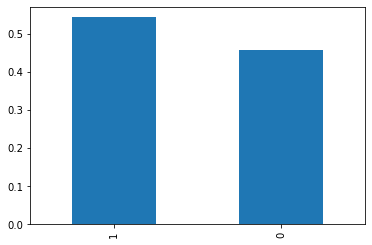

In [139]:
#plotting our target value to view how accurate is the balance
y.value_counts(normalize =True).plot(kind='bar')

In [182]:
#import sklearn library and split  our data into train and test set.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)
X_train.shape, X_test.shape,y_train.shape, y_test.shape

((44550, 39), (14850, 39), (44550,), (14850,))

In [140]:
#set up list for columns requiring different treatment
num_cols = []
ohe_cols = []
freq_cols =[]

for col in X.columns:
    if X[col].dtype in ['float64', 'int64']:
        num_cols.append(col)
    elif X[col].nunique() < 10:
        ohe_cols.append(col)
    else:
        freq_cols.append(col)

In [141]:
#print the list of numerical columns,categorical columns and frequency columns
print(num_cols)
print(ohe_cols)
print(freq_cols)

['amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private', 'region_code', 'district_code', 'population', 'construction_year']
['basin', 'public_meeting', 'recorded_by', 'permit', 'extraction_type_class', 'management_group', 'payment', 'payment_type', 'water_quality', 'quality_group', 'quantity', 'quantity_group', 'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group']
['date_recorded', 'funder', 'installer', 'wpt_name', 'subvillage', 'region', 'lga', 'ward', 'scheme_management', 'scheme_name', 'extraction_type', 'extraction_type_group', 'management', 'source']


In [142]:
#import more libaries from sklearn
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder,LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

In [143]:
#Using pipeline to preprocess our data
#steps
# scale the numerical columns
# for the categorical and frequency columns,
#use the imputer to fill value for null, then oneHotEncode the column

num_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
    ])

ohe_transformer = Pipeline(steps=[
    ('ohe_imputer', SimpleImputer(strategy='constant', fill_value= 0,)),
    ('oh_encoder', OneHotEncoder(drop='first',handle_unknown= 'error'))
])

freq_transformer = Pipeline(steps=[
    ('freq_encoder', ce.count.CountEncoder(normalize=True, min_group_size=.05)),
    ('freq_imputer', SimpleImputer(strategy='constant', fill_value= np.nan))
])

In [90]:
# Package those pieces together using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('ohe', ohe_transformer, ohe_cols),
        ('freq', freq_transformer, freq_cols)
    ])

In [91]:
#fit and transform the preprocessor 
X_tr_transformed = preprocessor.fit_transform(X_train)
X_tr_transformed.shape

(44550, 94)

In [186]:
# convert the transformed data into a DataFrame 
X_tr_transformed =pd.DataFrame(X_tr_transformed)
X_tr_transformed

,0,1,2,3,4,5,6,7,8,9,...,84,85,86,87,88,89,90,91,92,93
0,0.000000,0.412238,0.912881,0.706062,0.0,0.010204,0.0875,0.016393,0.996523,0.0,...,0.000404,0.056117,0.016857,0.000382,0.175578,0.000022,0.448956,0.448956,0.159439,0.284377
1,0.000000,0.031469,0.841709,0.188963,0.0,0.112245,0.0375,0.000000,0.000000,1.0,...,0.000112,0.078182,0.014366,0.001706,0.618721,0.002716,0.448956,0.448956,0.680224,0.284377
2,0.004286,0.536713,0.760495,0.693333,0.0,0.153061,0.0125,0.022951,0.997516,0.0,...,0.000045,0.442245,0.015241,0.000561,0.618721,0.475398,0.161751,0.137531,0.159439,0.186442
3,0.000000,0.031469,0.000000,1.000000,0.0,0.183673,0.0750,0.000000,0.000000,0.0,...,0.000045,0.052503,0.008350,0.001010,0.618721,0.000022,0.080561,0.104781,0.680224,0.186442
4,0.001429,0.519231,0.858342,0.238957,0.0,0.102041,0.0500,0.001639,0.982613,0.0,...,0.000022,0.089764,0.042088,0.002492,0.175578,0.004175,0.448956,0.448956,0.159439,0.162985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44545,0.000000,0.636014,0.857643,0.880754,0.0,0.193878,0.0125,0.006557,0.988077,0.0,...,0.000022,0.442245,0.003502,0.000269,0.618721,0.000022,0.448956,0.448956,0.680224,0.284377
44546,0.000000,0.332867,0.779349,0.383034,0.0,0.142857,0.0125,0.003934,0.995529,0.0,...,0.000247,0.442245,0.011380,0.000090,0.618721,0.475398,0.138788,0.138788,0.680224,0.082492
44547,0.005714,0.282517,0.893466,0.056729,0.0,0.091837,0.0625,0.011803,0.993045,0.0,...,0.008732,0.442245,0.011717,0.000853,0.618721,0.475398,0.138788,0.138788,0.110303,0.283704
44548,0.000029,0.501049,0.921504,0.722954,0.0,0.020408,0.0625,0.002131,0.993045,0.0,...,0.000090,0.074411,0.010887,0.001930,0.175578,0.002694,0.448956,0.448956,0.050034,0.284377


In [29]:
#output of pipeline preprocessor
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', MinMaxScaler())]),
                                 ['amount_tsh', 'gps_height', 'longitude',
                                  'latitude', 'num_private', 'region_code',
                                  'district_code', 'population',
                                  'construction_year']),
                                ('ohe',
                                 Pipeline(steps=[('ohe_imputer',
                                                  SimpleImputer(fill_value=0,
                                                                strategy='constant')),
                                                 ('oh_encoder',
                                                  OneHotEncoder(drop='first'))]),
                                 ['basi...
                                 Pipeline(steps=[('freq_encoder',
                                                  CountEncoder(combine_min_nan_grou

In [31]:
Knn_classifier = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

In [188]:
#Crossvalidate the Xtrain dataset to generate the accuracy score
#from the sample folds
from sklearn.model_selection import cross_validate
cross_validate(Knn_classifier, X_train, y_train, return_train_score=True)

{'fit_time': array([1.50720596, 1.48137116, 1.45950294, 1.49053621, 1.59796   ]),
 'score_time': array([16.74847627, 16.19442487, 15.62920713, 17.40450692, 15.85300899]),
 'test_score': array([0.78350168, 0.78282828, 0.78843996, 0.78720539, 0.78069585]),
 'train_score': array([0.85448934, 0.85462963, 0.85339506, 0.85401235, 0.85260943])}

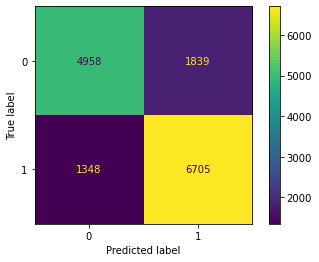

In [177]:
#plot confusion metrics to see our False positive and False negative
Knn_classifier.fit(X_train,y_train)
pred_tr = Knn_classifier.predict(X_train)
pred_te = Knn_classifier.predict(X_test)
plot_confusion_matrix(Knn_classifier,X_test,y_test)

In [190]:
#print the training and test score
from sklearn.metrics import precision_score,recall_score,f1_score

print("Training:")
print(f"Precision score: {precision_score(y_train,pred_tr)}")
print(f"Recall score: {recall_score(y_train,pred_tr)}")
print(f"F1 score: {f1_score(y_train,pred_tr)}")

print("---------------")

print("Test:")
print(f"Precision score: {precision_score(y_test,pred_te)}")
print(f"Recall score: {recall_score(y_test,pred_te)}")
print(f"F1 score: {f1_score(y_test,pred_te)}")


Training:
Precision score: 0.8504841428515426
Recall score: 0.8962653887465918
F1 score: 0.8727748164537866
---------------
Test:
Precision score: 0.7847612359550562
Recall score: 0.8326089656028809
F1 score: 0.807977345303368


# Grid Search CV

In [54]:
#tuning the parameter of the Knn classifier for a better model
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix

In [44]:
#set the n_neighbors to 3 and 10
#set the metric to euclidean since we use the default metric in the first model
param = [{ 
    'classifier__n_neighbors': [3,10],
    'classifier__metric':['euclidean']}]

In [45]:
grid = GridSearchCV(estimator = Knn_classifier,
                    param_grid = param, scoring='accuracy')

In [46]:
output = grid.fit(X_train,y_train)

In [47]:
output.best_params_

{'classifier__metric': 'euclidean', 'classifier__n_neighbors': 3}

In [118]:
output.best_score_

0.788327721661055

In [179]:
output.best_estimator_.fit(X_train,y_train)
preds_tr_best = output.best_estimator_.predict(X_train)
preds_te_best = output.best_estimator_.predict(X_test)

In [167]:
print(f"training score: {output.best_estimator_.score(X_train,y_train)}")
print(f"validation score: {output.best_estimator_.score(X_test,y_test)}")

training score: 0.8861503928170594
validation score: 0.7843771043771044


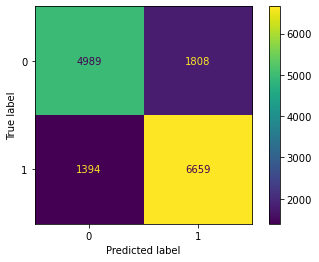

In [158]:
#plot confusion metrics to see our False positive and False negative
plot_confusion_matrix(output.best_estimator_,X_test,y_test)

In [189]:
#Print the metrics to compare with other models
print("Training:")
print(f"Precision score: {precision_score(y_train,preds_tr_best)}")
print(f"Recall score: {recall_score(y_train,preds_tr_best)}")
print(f"F1 score: {f1_score(y_train,preds_tr_best)}")

print("---------------")

print("Test:")
print(f"Precision score: {precision_score(y_test,preds_te_best)}")
print(f"Recall score: {recall_score(y_test,preds_te_best)}")
print(f"F1 score: {f1_score(y_test,preds_te_best)}")

Training:
Precision score: 0.8800953516090584
Recall score: 0.9151450053705693
F1 score: 0.8972780298120544
---------------
Test:
Precision score: 0.7864650997992205
Recall score: 0.8268968086427418
F1 score: 0.8061743341404358


# Evaluation

- Knn model with a distance metric euclidean and n_neighbor 3 was able to produce a model with f1 score of 90% on training set and f1 score of 81% on test set. We will compare the model with other classifier models for the best in order to predict the class. 

 - Compared to other Model, Knn Model took several hours to produce an output. It is probably not the best for classifying the business problem. So we decided to use decision tree.